## Visualising Clustering with Voronoi Tesselations

When experimenting with using the Voronoi Tesselation to identify which machines are picked up by certain points, it was easy to extend the idea to visualising clustering through a voronoi.

Using the `voronoi_finite_polygons_2d` method from `pycobra.visualisation`, it's easy to do this

In [1]:
%matplotlib inline
import numpy as np
from pycobra.cobra import cobra
from pycobra.visualisation import visualisation
from pycobra.diagnostics import diagnostics
import matplotlib.pyplot as plt
from sklearn import cluster

Let's make some blobs so clustering is easy.

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, Y = make_blobs(n_samples=200, centers=2, n_features=2)
Y = np.power(X[:,0], 2) + np.power(X[:,1], 2)

We set up a few scikit-learn clustering machines which we'd like to visualise the results of.

In [3]:
two_means = cluster.KMeans(n_clusters=2)
spectral = cluster.SpectralClustering(n_clusters=2, eigen_solver='arpack', affinity="nearest_neighbors")
dbscan = cluster.DBSCAN(eps=.6)
affinity_propagation = cluster.AffinityPropagation(damping=.9, preference=-200)
birch = cluster.Birch(n_clusters=2)

In [4]:
from pycobra.visualisation import voronoi_finite_polygons_2d
from scipy.spatial import Voronoi, voronoi_plot_2d

Helper function to implement the Voronoi.

In [5]:
def plot_cluster_voronoi(data, algo):
    # passing input space to set up voronoi regions.
    points = np.hstack((np.reshape(data[:,0], (len(data[:,0]), 1)), np.reshape(data[:,1], (len(data[:,1]), 1))))
    vor = Voronoi(points)
    # use helper Voronoi
    regions, vertices = voronoi_finite_polygons_2d(vor)
    fig, ax = plt.subplots()
    plot = ax.scatter([], [])
    indice = 0
    for region in regions:
        ax.plot(data[:,0][indice], data[:,1][indice], 'ko')
        polygon = vertices[region]
        # if it isn't gradient based we just color red or blue depending on whether that point uses the machine in question
        color = algo.labels_[indice]
        # we assume only two 
        if color == 0:
            color = 'r'
        else:
            color = 'b'
        ax.fill(*zip(*polygon), alpha=0.4, color=color, label="")
        indice += 1
    ax.axis('equal')
    plt.xlim(vor.min_bound[0] - 0.1, vor.max_bound[0] + 0.1)
    plt.ylim(vor.min_bound[1] - 0.1, vor.max_bound[1] + 0.1)

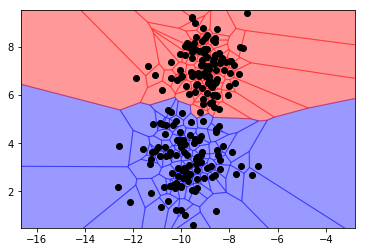

In [6]:
two_means.fit(X)
plot_cluster_voronoi(X, two_means)

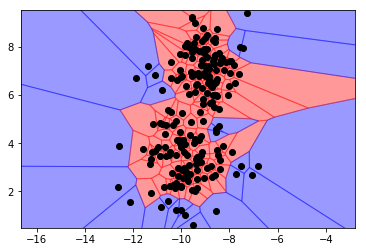

In [7]:
dbscan.fit(X)
plot_cluster_voronoi(X, dbscan)

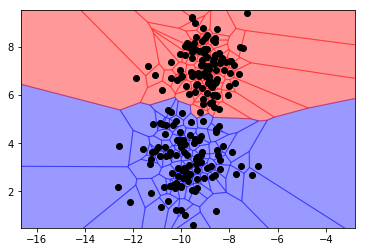

In [8]:
spectral.fit(X)
plot_cluster_voronoi(X, spectral)

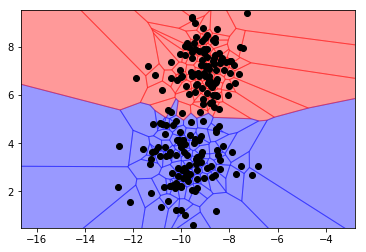

In [9]:
affinity_propagation.fit(X)
plot_cluster_voronoi(X, affinity_propagation)

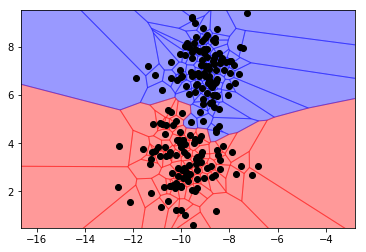

In [10]:
birch.fit(X)
plot_cluster_voronoi(X, birch)

This is just an example of the things you can do with Voronoi Tesselations - it's an interesting way to look at your data!